# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


If there are any Remove the duplicate index column from the dataset. 

In [3]:
data = raw_data.copy()
#data = data.drop(['Unnamed: 0'], axis = 1)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


## Select the features

In [5]:
x = data_mapped.iloc[:,3:4] #This does not need reshaping while fitting as it gives back dataframe
#x= data_mapped['continent'] #This will need reshaping while fitting

In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
x.head()

,continent
0,0
1,2
2,3
3,0
4,1


## Clustering

Use 4 clusters initially.

In [8]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 3, 1, 0, 0, 0, 0, 3, 1, 3, 2, 2, 2, 2, 0, 2, 0, 3, 1, 0, 1, 1,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 2, 1, 1, 0, 2, 1, 3,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 3, 2, 2, 3, 3, 0, 2, 1, 3, 2, 2, 0, 0,
       3, 0, 1, 3, 2, 3, 0, 0, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 1, 3, 3, 3, 3, 2, 0, 1,
       3, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 2, 2, 2, 3, 1, 1, 1])

In [10]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,0
5,Aland,19.953288,60.214887,1,0
6,Andorra,1.560544,42.542291,1,0
7,United Arab Emirates,54.300167,23.905282,2,3
8,Argentina,-65.179807,-35.381349,4,1
9,Armenia,44.929933,40.289526,2,3


## Plot the data

In [13]:
#Using Matplotlib
#plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
#plt.xlim(-180,180)
#plt.ylim(-90, 90)
#plt.show()

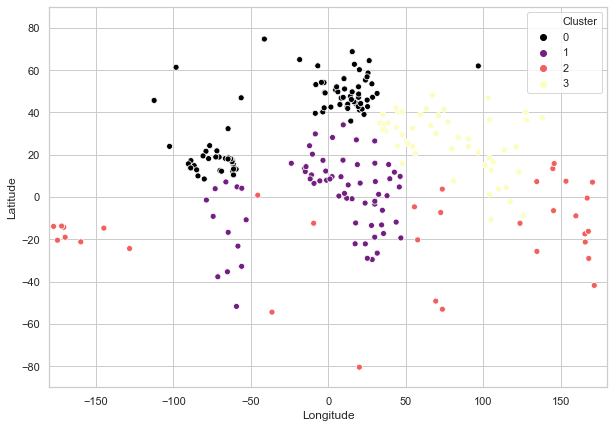

In [14]:
#Using Seaborn
plt.figure(figsize=(10,7))
plt.xlim(-180,180)
plt.ylim(-90, 90)
sns.set_style('whitegrid')
sns.scatterplot(data['Longitude'], data['Latitude'], hue=data_with_clusters['Cluster'],palette='magma')

### Selecting Optimal Number of K

In [15]:
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,20):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

C:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (13

In [16]:
wcss

[660.5311203319502,
 207.19425531914894,
 73.14292046839793,
 41.038218000904564,
 19.447308909995478,
 8.969696969696969,
 0.8888888888888888,
 7.909563170005051e-29,
 7.909563170005051e-29,
 3.965258643899992e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29,
 3.215840783940031e-29]

Text(0, 0.5, 'Within-cluster Sum of Squares')

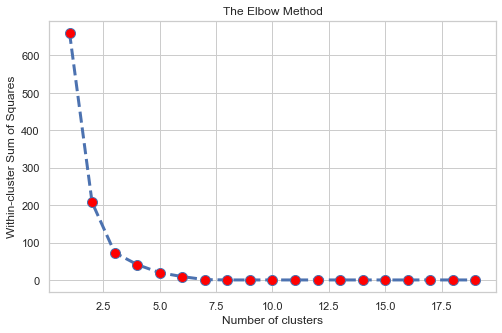

In [17]:
number_clusters = range(1,20)
plt.figure(figsize=(8,5))
plt.plot(number_clusters,wcss, linestyle='--', marker='o', markerfacecolor='red', linewidth=3, markersize=10)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')